# Example of LSTM and GRU - IMDB dataset

Recurrent Neural Networks suffer from short-term memory and vanishing gradient problem.

When using a long sequence, the model has a hard time carrying information from earlier steps to later ones. So for the IMBD dataset, if the goal is to process a paragraph of text to make predictions, RNN’s may leave out important information from the beginning.

The vanishing gradient problem occurs when the gradient shrinks as it back propagates. As its value is used to update a neural networks weights, if its value becomes minimal, it won't contribute for the learning process.

LSTM ’s and GRU’s were created as the solution to short-term memory. LSTM's have a similar control flow as RNN's, the differences being the operations within the LSTM’s cells. This operations are processed at internal mechanisms called gates, that can regulate the flow of information by learning which data is important to keep or throw away.

Source: (https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

#### Loading and pre-processing dataset

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Dense, Embedding


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)
input_train = sequence.pad_sequences(x_train, maxlen=500)
input_test = sequence.pad_sequences(x_test, maxlen=500)

#### Defining and training the LSTM model

In [ ]:
# the LSTM layer can be replaced by GRU (from keras.layers import GRU): model.add(GRU(32))
# example further down

In [4]:
model = models.Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)              

In [5]:
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

history_dict = history.history

Epoch 1/5
157/157 [==============================] - 102s 604ms/step - loss: 0.6145 - acc: 0.6535 - val_loss: 0.4513 - val_acc: 0.8112
Epoch 2/5
157/157 [==============================] - 83s 528ms/step - loss: 0.3764 - acc: 0.8464 - val_loss: 0.3093 - val_acc: 0.8760
Epoch 3/5
157/157 [==============================] - 90s 576ms/step - loss: 0.2811 - acc: 0.8901 - val_loss: 0.4285 - val_acc: 0.8486
Epoch 4/5
157/157 [==============================] - 97s 617ms/step - loss: 0.2381 - acc: 0.9126 - val_loss: 0.3942 - val_acc: 0.8538
Epoch 5/5
157/157 [==============================] - 102s 645ms/step - loss: 0.2031 - acc: 0.9265 - val_loss: 0.3239 - val_acc: 0.8868


#### Plot the training set accuracy and loss

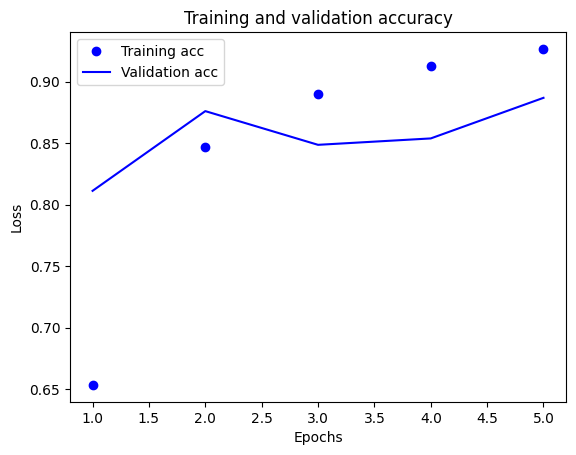

[0.35021495819091797, 0.8730800151824951]


In [6]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model.evaluate(input_test, y_test, verbose = 0)
print(results)

#### Defining and training an LSTM with two layers

In [7]:
model2 = models.Sequential()
model2.add(Embedding(10000, 32))
model2.add(LSTM(32, return_sequences = True))
model2.add(LSTM(32))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model2.summary()

history2 = model2.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

history_dict2 = history2.history

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 221s 1s/step - loss: 0.5882 - acc: 0.6607 - val_loss: 0.4274 - val_acc: 0.8202
Epoch 2/5
157/157 [=============================

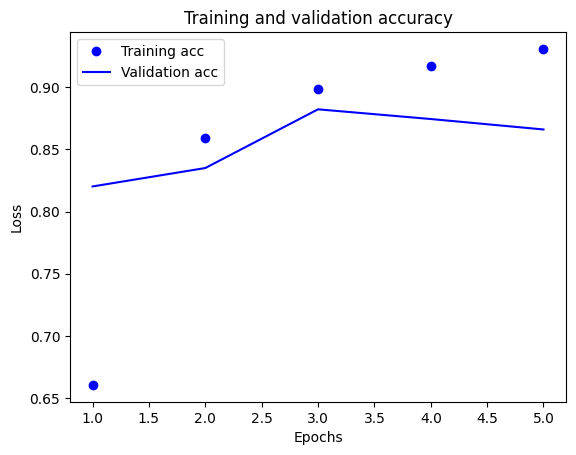

[0.3278190493583679, 0.8597599864006042]


In [8]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict2['acc'] 
val_acc_values = history_dict2['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model2.evaluate(input_test, y_test, verbose = 0)
print(results)

#### Defining and training a GRU model

GRU's are gated recurrent units, and they don't have a cell state to transfer information, using the hidden state. It also only has two gates, a reset gate and update gate.

In [9]:
from tensorflow.keras.layers import GRU
model3 = models.Sequential()
model3.add(Embedding(10000, 32))
model3.add(GRU(32))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model3.summary()

history3 = model3.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

history_dict3 = history3.history

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 71s 389ms/step - loss: 0.6134 - acc: 0.6483 - val_loss: 0.4496 - val_acc: 0.7850
Epoch 2/5
157/157 [==============================] - 69s 443ms/step - loss: 0.3595 - acc: 0.8457 - val_loss: 0.3478 - val_acc: 0.8500
Epoch 3/5
157/157 [=========================

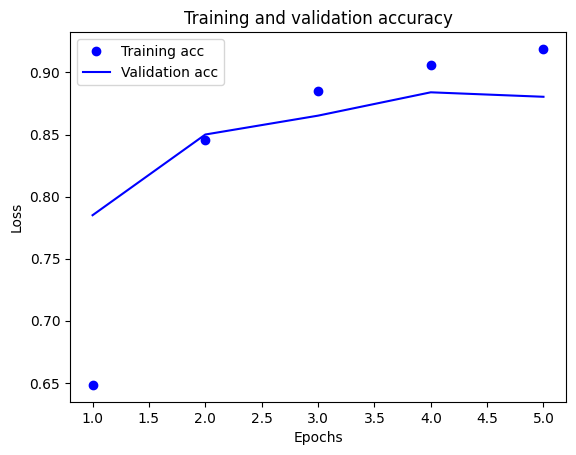

[0.33588188886642456, 0.8702800273895264]


In [10]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict3['acc'] 
val_acc_values = history_dict3['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model3.evaluate(input_test, y_test, verbose = 0)
print(results)

#### LSTM with Dropout

In [11]:
from tensorflow.keras.layers import Dropout
model4 = models.Sequential()
model4.add(Embedding(10000, 32))
model4.add(LSTM(32, return_sequences = True))
model4.add(Dropout(0.2))
model4.add(LSTM(32))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model4.summary()

history4 = model4.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

history_dict4 = history4.history

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_4 (LSTM)               (None, None, 32)          8320      
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336,673
Trainable params: 336,673
Non-tr

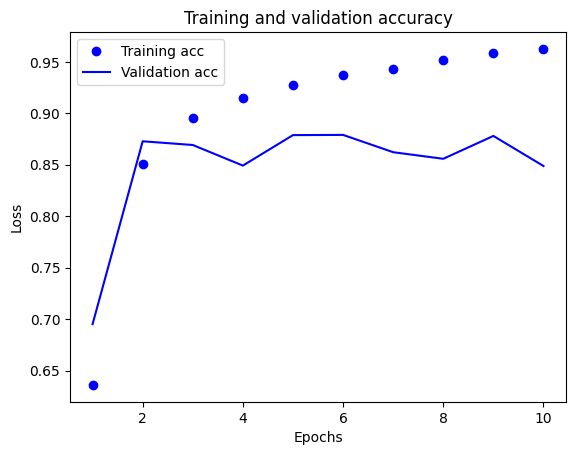

[0.7032992839813232, 0.8409199714660645]


In [12]:
import matplotlib.pyplot as plt
plt.clf()
acc_values = history_dict4['acc'] 
val_acc_values = history_dict4['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model4.evaluate(input_test, y_test, verbose = 0)
print(results)